In [1]:
using QuantumDynamics
using Plots
using LinearAlgebra

Hoping to get rid of the units issue by integrating Unitful into QuantumDynamics package.

In [2]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066
const mev2au = mev2invcm * invcm2au
const nm2au = 18.897

18.897

In [3]:
N = 5

5

In [4]:
    H0 = Matrix{ComplexF64}([
        4.144 0.026 0.109 -0.092 0.000
        0.026 4.070 0.090 -0.112 0.000
        0.109 0.090 4.509 0.000 0.070
        -0.092 -0.112 0.000 4.992 0.087
        0.000 0.000 0.070 0.087 4.065 
    ]) * 1000 * mev2au

5×5 Matrix{ComplexF64}:
    0.152298+0.0im  0.000955535+0.0im  …  -0.00338112+0.0im         0.0+0.0im
 0.000955535+0.0im     0.149578+0.0im     -0.00411615+0.0im         0.0+0.0im
   0.0040059+0.0im   0.00330762+0.0im             0.0+0.0im   0.0025726+0.0im
 -0.00338112+0.0im  -0.00411615+0.0im        0.183463+0.0im  0.00319737+0.0im
         0.0+0.0im          0.0+0.0im      0.00319737+0.0im    0.149394+0.0im

In [5]:
show(stdout, "text/plain", real.(H0))

5×5 Matrix{Float64}:
  0.152298      0.000955535  0.0040059   -0.00338112  0.0
  0.000955535   0.149578     0.00330762  -0.00411615  0.0
  0.0040059     0.00330762   0.165712     0.0         0.0025726
 -0.00338112   -0.00411615   0.0          0.183463    0.00319737
  0.0           0.0          0.0025726    0.00319737  0.149394

In [23]:
dt = 1.0/au2fs 

41.34137457575099

In [24]:
nsteps = 3000
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[1, 1] = 1.0

T = 50.0:50.0:500.0

β = 1 / (T[6] * 3.16683e-6) # T = 300K

1052.5772881188234

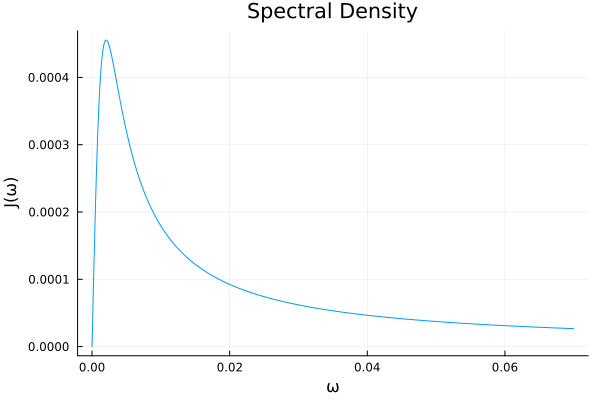

In [12]:
Jw2 = SpectralDensities.DrudeLorentz(λ=100*invcm2au, γ=450*invcm2au, Δs=1.0)
ω = 0:0.0001:0.07
ωs2, cs2 = SpectralDensities.discretize(Jw2, 100)
plot(ω, Jw2.(ω), xlabel="ω", ylabel="J(ω)", title="Spectral Density", legend=false)

In [9]:
using DelimitedFiles
open("Jw_1.txt", "w") do io
    writedlm(io, [ω  Jw2.(ω)], ' ')
end

In [20]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt, ntimes=nsteps)
tquapi, ρquapi = QuAPI.propagate(; 
                                fbU=fbU, 
                                Jw=[Jw2],
                                β=β,
                                ρ0=ρ0,
                                dt,
                                ntimes=nsteps,
                                svec=[1.0 2.0 3.0 4.0 5.0],
                                kmax=3,
                                verbose=true)

[ Info: Starting propagation within memory
[ Info: Step = 1, #paths = 1
[ Info: Step = 2, #paths = 25
[ Info: Step = 3, #paths = 625
[ Info: Starting iteration
[ Info: Step = 4, #paths = 15625
[ Info: Step = 5, #paths = 390625
[ Info: Step = 6, #paths = 390625
[ Info: Step = 7, #paths = 390625
[ Info: Step = 8, #paths = 390625
[ Info: Step = 9, #paths = 390625
[ Info: Step = 10, #paths = 390625
[ Info: Step = 11, #paths = 390625
[ Info: Step = 12, #paths = 390625
[ Info: Step = 13, #paths = 390625
[ Info: Step = 14, #paths = 390625
[ Info: Step = 15, #paths = 390625
[ Info: Step = 16, #paths = 390625
[ Info: Step = 17, #paths = 390625
[ Info: Step = 18, #paths = 390625
[ Info: Step = 19, #paths = 390625
[ Info: Step = 20, #paths = 390625
[ Info: Step = 21, #paths = 390625
[ Info: Step = 22, #paths = 390625
[ Info: Step = 23, #paths = 390625
[ Info: Step = 24, #paths = 390625
[ Info: Step = 25, #paths = 390625
[ Info: Step = 26, #paths = 390625
[ Info: Step = 27, #paths = 390625
[ Info:

(0.0:206.70687287875495:124024.12372725297, [1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.7787474893095337 + 0.0im -0.075505572172527 + 0.045002889217628066im … 0.028939496746919098 + 0.05215165678302537im 0.009612602801522957 + 0.07809043811587439im; … ; 0.20972684849377957 + 3.1212206756658375e-17im 0.006025696325616897 + 0.00013922777215944978im … 0.01325955692460138 - 0.0005666089688855456im 0.02912362995426102 - 0.0020777021204692377im; 0.20967155240534566 + 5.745862979344142e-17im 0.006039271649644503 + 0.00013820087591704538im … 0.013257848066709892 - 0.0005664179100363753im 0.02911722110272712 - 0.0020775217132724486im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -0.075505572172527 - 0.045002889217628066im 0.010111972921766082 + 0.0im … 0.00022007774131957945 - 0.007123892291167895im 0.0038637130268381102 - 0.008769222495781569im; … ; 0.006025696325616889 - 0.00013922777215940628im 0.26729868936564083 + 9.273286463999531e-17im … 0.024773857226173573 - 0.0005548

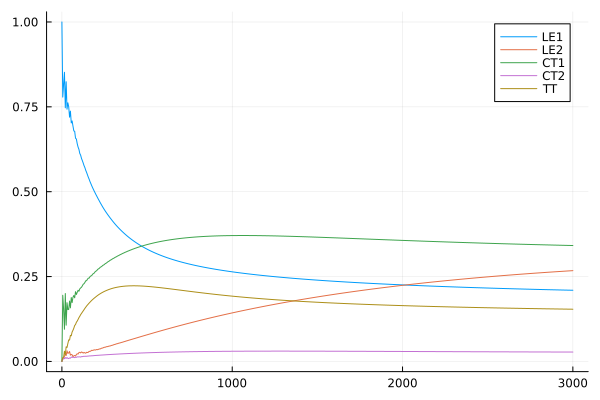

In [21]:
plot(tquapi.*au2fs, real.(ρquapi[:, 1, 1]), label="LE1")
plot!(tquapi.*au2fs, real.(ρquapi[:, 2, 2]), label="LE2")
plot!(tquapi.*au2fs, real.(ρquapi[:, 3, 3]), label="CT1")
plot!(tquapi.*au2fs, real.(ρquapi[:, 4, 4]), label="CT2")
plot!(tquapi.*au2fs, real.(ρquapi[:, 5, 5]), label="TT")

In [27]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt=dt, ntimes=nsteps)
@time t_TTM, ρ_TTM = TTM.propagate(; fbU=fbU,
                            Jw=[Jw2],
                            β=β,
                            ρ0=ρ0,
                            dt=dt,
                            ntimes=nsteps,
                            rmax=1,
                            svec=[1.0 2.0 3.0 4.0 5.0],
                            extraargs=TEMPO.TEMPOArgs(),
                            path_integral_routine=TEMPO.build_augmented_propagator)

124.173253 seconds (36.27 M allocations: 345.221 GiB, 7.52% gc time)


(0.0:41.34137457575099:124024.12372725297, [1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.955862431394193 + 5.0611970397904526e-18im -0.019681135179391903 - 0.031545099307900025im … 0.09094531174467929 + 0.08614999073430901im -0.0009502378040599851 - 0.0018476578433143367im; … ; -9929.78050802197 - 3.0984089993995413e-8im -7138.420317561457 - 895.1287224362716im … 42135.499915830005 + 4532.953967952755im 56410.450287533175 + 12038.054226416454im; -2512.608192525594 + 2.6417544090812595e-8im -1434.5292815516766 + 3786.1379182566616im … 12928.071695522398 - 51520.25573787603im 405.6417262026848 + 49455.00301795471im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -0.019681135179391785 + 0.031545099307900004im 0.0014479640978542882 + 7.914675859144182e-18im … -0.004732191528460924 + 0.0012318341838898766im 8.091801438522064e-5 + 6.714927867742894e-6im; … ; -7138.420317538498 + 895.1287224042111im -3346.4389679814885 - 1.2055858942900325e-8im … 7880.520835916115 - 3820.3505177

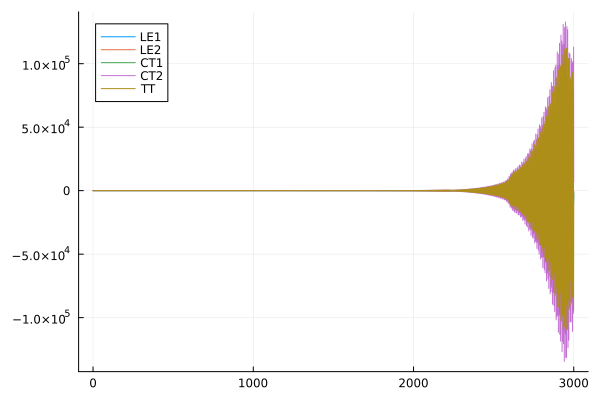

In [28]:
plot(t_TTM.*au2fs, real.(ρ_TTM[:, 1, 1]), label="LE1")
plot!(t_TTM.*au2fs, real.(ρ_TTM[:, 2, 2]), label="LE2")
plot!(t_TTM.*au2fs, real.(ρ_TTM[:, 3, 3]), label="CT1")
plot!(t_TTM.*au2fs, real.(ρ_TTM[:, 4, 4]), label="CT2")
plot!(t_TTM.*au2fs, real.(ρ_TTM[:, 5, 5]), label="TT")

In [23]:
λs = repeat([100.0], 5) * mev2invcm * invcm2au
γs = repeat([450.0], 5) * mev2invcm * invcm2au
JwH = Vector{SpectralDensities.DrudeLorentz}()
sys_ops = Vector{Matrix{ComplexF64}}()
for (j, (λ, γ)) in enumerate(zip(λs, γs))
    push!(JwH, SpectralDensities.DrudeLorentz(; λ, γ, Δs=1.0))
    op = zeros(5, 5)
    op[j, j] = 1.0
    push!(sys_ops, op)
end

nsteps = 300
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[1, 1] = 1.0

T = 50.0:50.0:500.0

β = 1 / (300 * 3.16683e-6) # T = 300K

dt = 10/au2fs

413.4137457575099

In [24]:
times_HEOM, ρs_HEOM = HEOM.propagate(; Hamiltonian=H0, ρ0, β, dt, ntimes=nsteps, Jw=JwH, sys_ops=sys_ops, num_modes=1, Lmax=2)

([0.0, 413.4137457575099, 826.8274915150198, 1240.2412372725298, 1653.6549830300396, 2067.0687287875494, 2480.482474545059, 2893.8962203025694, 3307.309966060079, 3720.723711817589  …  120303.40001543539, 120716.8137611929, 121130.22750695041, 121543.64125270791, 121957.05499846542, 122370.46874422293, 122783.88248998045, 123197.29623573796, 123610.70998149546, 124024.12372725297], [1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.8407473348775626 + 0.0im -0.014980880285837965 - 0.0025485937130136473im … 0.05374859969215964 + 0.03215717852339018im -0.0050333257076143004 + 0.031273319728088764im; … ; 0.26315999055453587 + 0.0im -0.003159234139047305 + 0.0030792868987168575im … 0.010197580448124272 - 0.0005110243146092732im 0.0029917342624755476 + 0.006442947918133456im; 0.26315999055548434 + 0.0im -0.0031592341402452953 + 0.0030792868975427585im … 0.010197580436632221 - 0.0005110243109576838im 0.0029917342654749465 + 0.006442947922105169im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.

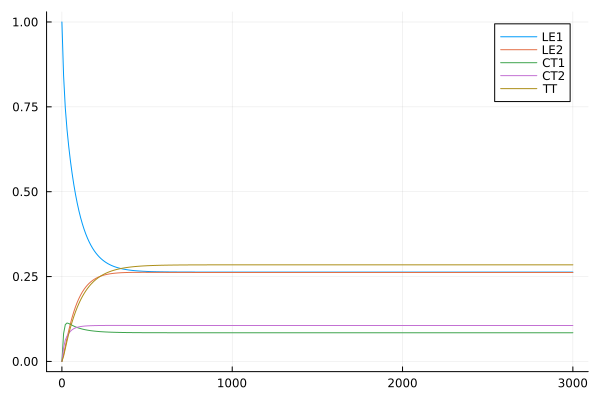

In [25]:
plot(times_HEOM.*au2fs, real.(ρs_HEOM[:, 1, 1]), label="LE1")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 2, 2]), label="LE2")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 3, 3]), label="CT1")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 4, 4]), label="CT2")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 5, 5]), label="TT")

In [49]:
times_BRME, ρs_BRME = BlochRedfield.propagate(;
                                            Hamiltonian=H0,
                                            Jw=JwH,
                                            β,
                                            ρ0,
                                            dt,
                                            ntimes=nsteps,
                                            sys_ops)

([0.0, 413.4137457575099, 826.8274915150198, 1240.2412372725298, 1653.6549830300396, 2067.0687287875494, 2480.482474545059, 2893.8962203025694, 3307.309966060079, 3720.723711817589  …  120303.40001543539, 120716.8137611929, 121130.22750695041, 121543.64125270791, 121957.05499846542, 122370.46874422293, 122783.88248998045, 123197.29623573796, 123610.70998149546, 124024.12372725297], [0.9999999999999999 + 0.0im -1.51627942200281e-17 + 0.0im … 1.828851942922616e-18 + 0.0im -2.0549532860419624e-17 + 0.0im; 0.8217516369565607 + 1.185271204776302e-16im 0.08553445985658513 + 0.09698469243839505im … 0.09209965822060612 + 0.062229582545500324im -0.06297782727040584 + 0.05826725356664929im; … ; 0.04367937237719178 - 4.707951762905921e-12im 0.03816637885536106 - 2.081281753408407e-6im … 0.004758151852746925 - 4.514732063407573e-7im 0.04556128578811887 + 2.3083894633270244e-6im; 0.04367937086657117 - 2.248452831115925e-11im 0.03816651373049396 - 2.0362276273810975e-6im … 0.004758168113148857 - 4.4

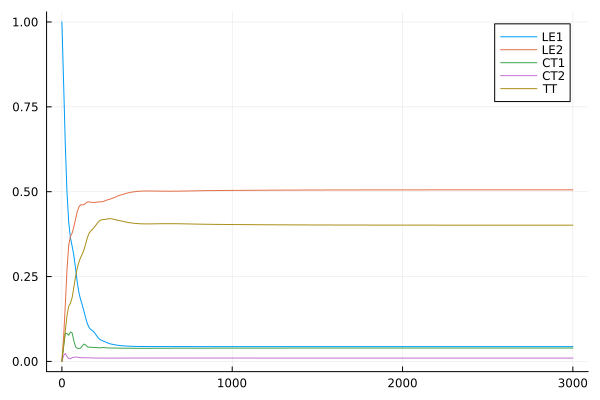

In [50]:
plot(times_BRME.*au2fs, real.(ρs_BRME[:, 1, 1]), label="LE1")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 2, 2]), label="LE2")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 3, 3]), label="CT1")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 4, 4]), label="CT2")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 5, 5]), label="TT")

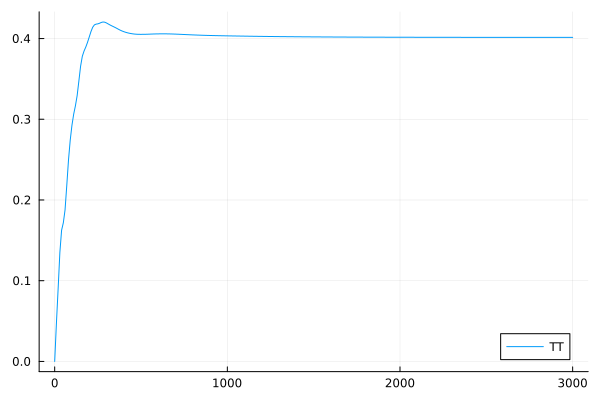

In [51]:
plot(times_BRME.*au2fs, real.(ρs_BRME[:, 5, 5]), label="TT")